 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8891/notebooks/DosserNorthernTS.ipynb#Look-at-Dosser-Values" data-toc-modified-id="Look-at-Dosser-Values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Look at Dosser Values</a></span></li><li><span><a href="http://localhost:8891/notebooks/DosserNorthernTS.ipynb#Look-at-Thomson-Values" data-toc-modified-id="Look-at-Thomson-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Look at Thomson Values</a></span></li><li><span><a href="http://localhost:8891/notebooks/DosserNorthernTS.ipynb#Compare-Values" data-toc-modified-id="Compare-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare Values</a></span></li><li><span><a href="http://localhost:8891/notebooks/DosserNorthernTS.ipynb#Interpolate-onto-NEMO-levels" data-toc-modified-id="Interpolate-onto-NEMO-levels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpolate onto NEMO levels</a></span></li></ul></div>

In [98]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
from scipy import interpolate

from salishsea_tools import nc_tools

%matplotlib inline

# Look at Dosser Values

Dosser values are given in absolute salinity.  For Si of about 60 uMol this should be different from reference salinity by 0.01 g/kg (McDougall et al, 2012)

In [102]:
dosser = scipy.io.loadmat('JohnstoneStraitSeasonal.mat')

In [7]:
print(dosser['depth_mid'])

[[   2.18317691    8.01568035   13.06166124   18.59954472   23.88762813
    29.00815449   44.33455388   69.44643028   93.72338562  118.96307556
   143.84385196  168.65739492  193.11977079  254.39443413  393.52386924]]


In [20]:
print(dosser['salinity'][:,0])

[ 30.5774441   30.44884175  30.77485902  30.48672865  30.79946975
  30.57138851  30.84619853  31.38528897  31.42851927  31.25081721
  31.02022712  30.92114069]


In [34]:
print(np.concatenate((dosser['salinity'].transpose(),
                           dosser['salinity'].transpose()), axis=1).shape)

(15, 24)


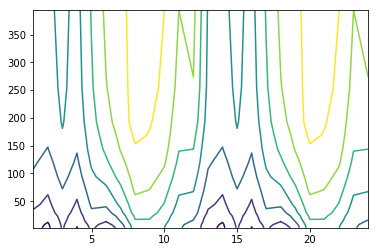

In [35]:
plt.contour(np.arange(1, 25), dosser['depth_mid'][0], 
            np.concatenate((dosser['salinity'].transpose(),
                           dosser['salinity'].transpose()), axis=1))

# Look at Thomson Values

In [103]:
nemoTEOS = nc.Dataset('SalishSea_north_TEOS10.nc')
print (nemoTEOS)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    title: Seasonal climatology of Temperature and Salinity at Johnstone Strait boundary in TEOS-10 variables - Conservative Temperature and Absolute Salinity
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/open_boundaries/north/SalishSea_north_TEOS10.nc
    comment: Temperature and salinity are TEOS-10 variables: Conservative Temperature and Reference Salinity
    source: https://bitbucket.org/salishsea/tools/src/tip/PrepareSimpleTS-Johnstone.ipynb
 https://bitbucket.org/salishsea/tools/src/tip/I_ForcingFiles/OBC/Temperature to conservative temperature in boundary conditions.ipynb
 https://bitbucket.org/salishsea/tools/I_ForcingFiles/OBC/create_TEOS-10_BCs.py
 https://bitbucket.org/salishsea/tools/I_ForcingFiles/OBC/reshape_BCs.py
    history: 
[2014-02-02 18:26] C

In [54]:
np.concatenate((nemoTEOS['vosaline'][:, :, 0, 0],
                           nemoTEOS['vosaline'][:,  :, 0, 0]), axis=0)
print(np.arange(4))

[0 1 2 3]


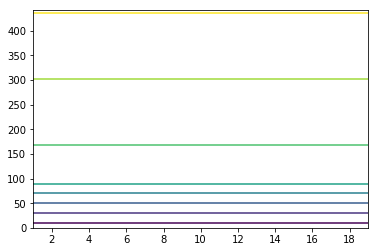

In [60]:
plt.contour(np.arange(1, 25, 6), nemoTEOS['deptht'][:], 
            np.concatenate((nemoTEOS['vosaline'][:, :, 0, 0].transpose(),
                           nemoTEOS['vosaline'][:,  :, 0, 0].transpose()), axis=1))

# Compare Values

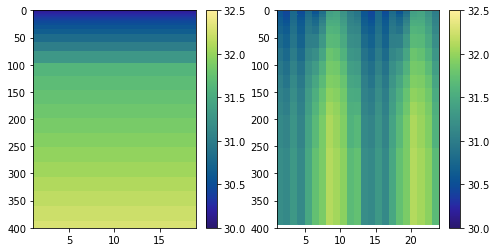

In [74]:
vmin, vmax = 30, 32.5
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
mesh = axs[0].pcolormesh(np.arange(1, 25, 6), nemoTEOS['deptht'][:], 
            np.concatenate((nemoTEOS['vosaline'][:, :, 0, 0].transpose(),
                           nemoTEOS['vosaline'][:,  :, 0, 0].transpose()), axis=1), 
                      vmax=vmax, vmin=vmin, cmap=cm.haline)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(np.arange(1, 25), dosser['depth_mid'][0], 
            np.concatenate((dosser['salinity'].transpose(),
                           dosser['salinity'].transpose()), axis=1), 
                       vmax=vmax, vmin=vmin, cmap=cm.haline)
fig.colorbar(mesh, ax=axs[1])
for ax in axs:
    ax.set_ylim((0, 400))
    ax.invert_yaxis()
 

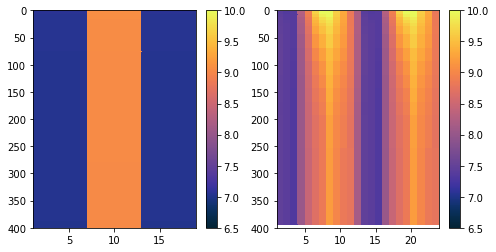

In [81]:
vmin, vmax = 6.5, 10
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
mesh = axs[0].pcolormesh(np.arange(1, 25, 6), nemoTEOS['deptht'][:], 
            np.concatenate((nemoTEOS['votemper'][:, :, 0, 0].transpose(),
                           nemoTEOS['votemper'][:,  :, 0, 0].transpose()), axis=1), 
                      cmap=cm.thermal, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(np.arange(1, 25), dosser['depth_mid'][0], 
            np.concatenate((dosser['temperature'].transpose(),
                           dosser['temperature'].transpose()), axis=1), cmap=cm.thermal,
                        vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=axs[1])
for ax in axs:
    ax.set_ylim((0, 400))
    ax.invert_yaxis()

# Interpolate onto NEMO levels

In [84]:
print (dosser['depth_mid'])

[[   2.18317691    8.01568035   13.06166124   18.59954472   23.88762813
    29.00815449   44.33455388   69.44643028   93.72338562  118.96307556
   143.84385196  168.65739492  193.11977079  254.39443413  393.52386924]]


In [92]:
salinity = np.empty((12, 40))
for pmonth in np.arange(12):
    f = interpolate.interp1d(dosser['depth_mid'][0], dosser['salinity'][pmonth], 
                             fill_value='extrapolate')
    salinity[pmonth] = f(nemoTEOS['deptht'][:])

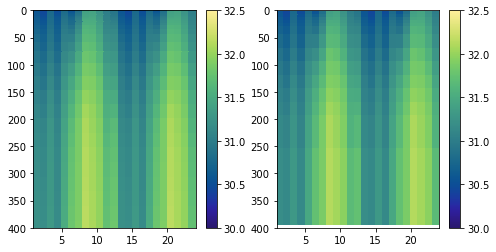

In [93]:
vmin, vmax = 30, 32.5
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
mesh = axs[0].pcolormesh(np.arange(1, 25), nemoTEOS['deptht'][:], 
            np.concatenate((salinity.transpose(),
                           salinity.transpose()), axis=1), 
                      vmax=vmax, vmin=vmin, cmap=cm.haline)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(np.arange(1, 25), dosser['depth_mid'][0], 
            np.concatenate((dosser['salinity'].transpose(),
                           dosser['salinity'].transpose()), axis=1), 
                       vmax=vmax, vmin=vmin, cmap=cm.haline)
fig.colorbar(mesh, ax=axs[1])
for ax in axs:
    ax.set_ylim((0, 400))
    ax.invert_yaxis()

In [94]:
temperature = np.empty((12, 40))
for pmonth in np.arange(12):
    f = interpolate.interp1d(dosser['depth_mid'][0], dosser['temperature'][pmonth], 
                             fill_value='extrapolate')
    temperature[pmonth] = f(nemoTEOS['deptht'][:])

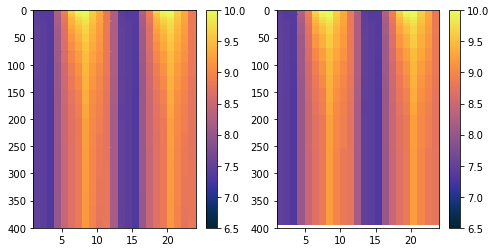

In [95]:
vmin, vmax = 6.5, 10
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
mesh = axs[0].pcolormesh(np.arange(1, 25), nemoTEOS['deptht'][:], 
            np.concatenate((temperature.transpose(),
                           temperature.transpose()), axis=1), 
                      vmax=vmax, vmin=vmin, cmap=cm.thermal)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(np.arange(1, 25), dosser['depth_mid'][0], 
            np.concatenate((dosser['temperature'].transpose(),
                           dosser['temperature'].transpose()), axis=1), 
                       vmax=vmax, vmin=vmin, cmap=cm.thermal)
fig.colorbar(mesh, ax=axs[1])
for ax in axs:
    ax.set_ylim((0, 400))
    ax.invert_yaxis()

In [104]:
nemo = nc.Dataset('Dosser_north_TEOS10.nc', 'w', zlib=True)

# dataset attributes
nc_tools.init_dataset_attrs(
    nemo, 
    title='Temperature & Salinity Boundary Conditions for Northern Boundary', 
    notebook_name='DosserNorthernTS', 
    nc_filepath='tracers/north/Dosser_north_TEOS10.nc',
    comment='T & S data from Hayley Dosser monthly climatology, TEOS10') 

# dimensions
nemo.createDimension('xbT', 30)
nemo.createDimension('yb', 10)
nemo.createDimension('deptht',size = nemoTEOS['deptht'][:].shape[0])
nemo.createDimension('time_counter', None)

# variables
# deptht
deptht = nemo.createVariable('deptht', 'float32', ('deptht',))
deptht.long_name = 'Vertical T Levels'
deptht.units = 'm'
deptht.positive = 'down'
deptht.valid_range = np.array((4., 428.))
# time_counter
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.long_name = 'Time axis'
time_counter.axis = 'T'
time_counter.units = 'months'
# votemper
votemper = nemo.createVariable('votemper', 'float32', 
                               ('time_counter','deptht','yb','xbT'))
votemper.units = 'degC'
votemper.long_name = 'Conservative Temperature'   
# vosaline
vosaline = nemo.createVariable('vosaline', 'float32', 
                               ('time_counter','deptht','yb','xbT'))
vosaline.units = 'g/kg'
vosaline.long_name = 'Absolute Salinity'  

file format: NETCDF4
Conventions: CF-1.6
title: Temperature & Salinity Boundary Conditions for Northern Boundary
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/I_ForcingFiles/OBC/DosserNorthernTS.ipynb
references: REQUIRED
history: [2018-07-14 14:42:33] Created netCDF4 zlib=True dataset.
comment: T & S data from Hayley Dosser monthly climatology, TEOS10


In [106]:
nemo.setncattr('references', 'tracers/north/Dosser_north_TEOS10.nc')

In [105]:
# depths, time counter
deptht[:] = nemoTEOS['deptht'][:]
time_counter[0:12] = range(1,13)

In [115]:
# values
for t in range(12):
    for iz in range(nemoTEOS['deptht'][:].shape[0]):
        votemper[t, iz, :, :] = temperature[t, iz]
        vosaline[t, iz, :, :] = salinity[t, iz]

In [116]:
nemo.close()

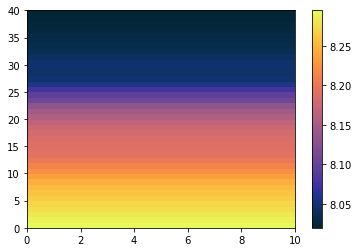

In [119]:
nemo_check = nc.Dataset('Dosser_north_TEOS10.nc')
plt.pcolormesh(nemo_check['votemper'][3, :, :, 0], cmap=cm.thermal)
plt.colorbar()

In [120]:
nemo_check.close()